In [1]:
import os 
print(os.getcwd())
os.chdir(os.path.dirname(os.getcwd()))
print(os.getcwd())

c:\Users\magda\OneDrive\Escritorio\MDS_licitalab\RecSystem
c:\Users\magda\OneDrive\Escritorio\MDS_licitalab


In [3]:
import os
from src.utils.RecommenderSystem import RecommenderSystem  
import pandas as pd
from unidecode import unidecode  
import torch 
from sklearn.cluster import KMeans, AgglomerativeClustering 
import matplotlib.pyplot as plt

if torch.cuda.is_available():
    # Set the GPU device (assuming you have at least one GPU)
    gpu_device = 0  # You can change this to the index of the GPU you want to use
    torch.cuda.set_device(gpu_device)
    device = torch.device("cuda")
    print(f"Using GPU: {torch.cuda.get_device_name(gpu_device)}")
else:
    # If no GPU is available, use the CPU
    device = torch.device("cpu")
    print("No GPU available, using CPU")

Using GPU: NVIDIA GeForce RTX 3060


In [2]:
train_path = 'C:\\Users\\magda\\OneDrive\\Escritorio\\MDS_licitalab\\marzo.csv'
test_path =  'C:\\Users\\magda\\OneDrive\\Escritorio\\MDS_licitalab\\abril.csv'

#nrows = 20000
train = pd.read_csv(train_path)#,nrows=nrows) 
test = pd.read_csv(test_path)#,nrows=nrows)

In [3]:
train['feature_vector'] = train['agileoffereditemscategoriaofertada'] + ' ' + train['agileoffereditemsdescripcionofertada']
train['feature_vector'] = train['feature_vector'].apply(lambda x: unidecode(str(x)).lower())

test['feature_vector'] = test['agileoffereditemscategoriaofertada'] + ' ' + test['agileoffereditemsdescripcionofertada']
test['feature_vector'] = test['feature_vector'].apply(lambda x: unidecode(str(x)).lower())

In [7]:
RS = RecommenderSystem(train,
                       test,
                       save_path = os.getcwd())

Initializing Recommender System
The current directory is c:\Users\magda\OneDrive\Escritorio\MDS_licitalab\Modeling\hito_4
Using GPU: NVIDIA GeForce RTX 3060
Initializing User Space
Directory 'c:\Users\magda\OneDrive\Escritorio\MDS_licitalab\Modeling\hito_4\userspace_data' created or already exists.
['BERT_model.pkl', 'BERT_tokenizer.pkl', 'clustering_model.pkl', 'clusters.csv', 'corpus.csv', 'vectorized_corpus.csv']
All necesary files have been found.
Loaded cluster model
Loaded BERT_model
Loaded tokenizer
Loaded vectorized data
Loaded kmeans data
Se han removido 72.83% de taxnumberproviders, por tener < 10 licitaciones. 
 El numero de usuarios para crear el corpus será 1846.
Loaded corpus data
Se han removido 72.83% de taxnumberproviders, por tener < 10 licitaciones. 
 El numero de usuarios para crear el corpus será 1846.
Se han removido 75.15% de taxnumberproviders, por tener < 10 licitaciones. 
 El numero de usuarios para crear el corpus será 1378.


In [8]:
RS.describe()

dict_keys(['train', 'test', 'device', 'save_path', 'save_directory', 'files_in_directory', 'check_files', 'cluster_model', 'model', 'tokenizer', 'vectorized_corpus', 'data_with_clusters', 'corpus', 'qualifying_users', 'intersection'])


### Self recomendation

Se estudia el modelo tomando en consideración la siguiente hipótesis: si e modelo de recomendación es bueno, entonces, con la data de marzo, es posible recomendar compras ágiles en las que se participó en abril.

En primer lugar, se debe obtener la intersección de los ruts con n>10 participaciones en marzo como en abril.  

In [9]:
RS.evaluate_users()

KeyboardInterrupt: 

In [ ]:
#display(RS.a)
#display(RS.b)
#display(RS.c)
display(RS.d)

{'self_precision_porcentual_global': 0.11002094505111883,
 'self_recall_porcentual_global': 2.7581419185807627,
 'self_f1_score_porcentual_global': 0.20141736959406928,
 'total_participaciones_todos': 189020,
 'total_licitaciones_calzadas': 7402,
 'ratio_par_calz': 0.039159877261665435}

testing clusters in elbow method: 100%|██████████| 30/30 [00:09<00:00,  3.07user/s]


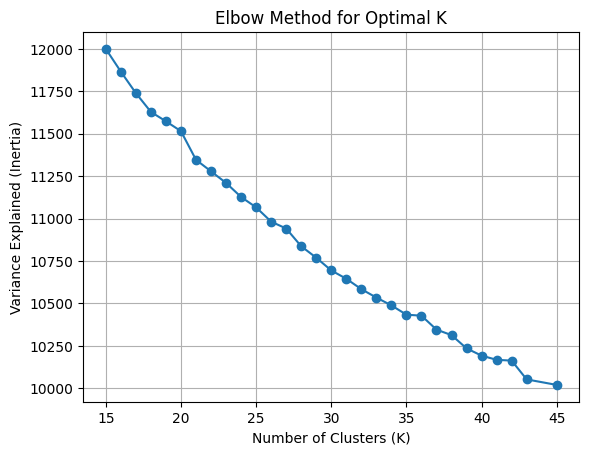

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Optimal n_clusters is 21
AgglomerativeClustering(n_clusters=21)
Used AgglomerativeClustering(n_clusters=21) to clusterize.

Silhouette Scores:
KMeans: 0.2985118
Agglomerative Clustering: 0.2985118


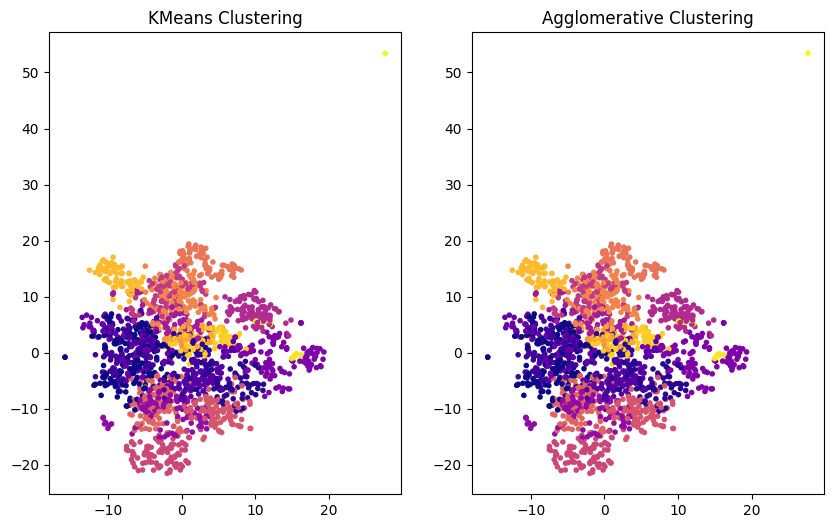

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


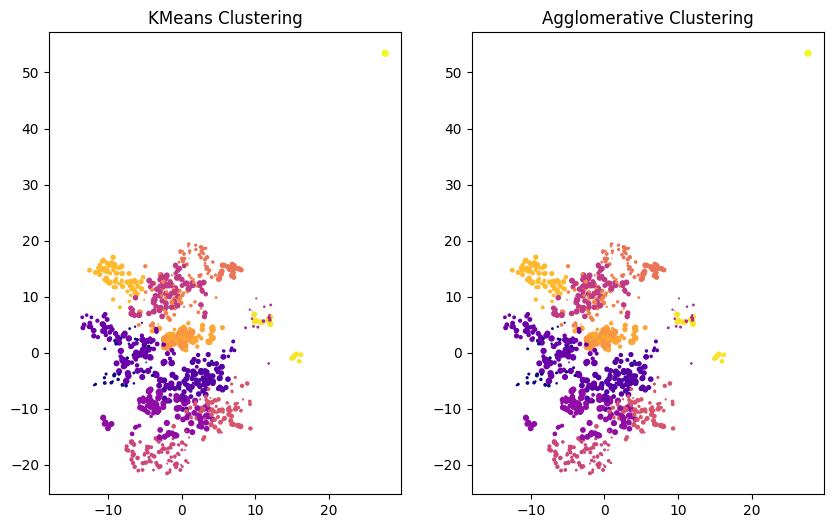

Exporting cluster model
Exporting clusters


In [ ]:
import numpy as np
RS.regenerate_clustering(AgglomerativeClustering())#,np.linspace(20,65,40,dtype = int))

In [ ]:
RS.evaluate_users()

Processing RUTs: 100%|██████████| 1240/1240 [04:48<00:00,  4.30it/s]


In [ ]:
display(RS.d)

{'self_precision_porcentual_global': 0.11002094505111883,
 'self_recall_porcentual_global': 2.7581419185807627,
 'self_f1_score_porcentual_global': 0.20141736959406928,
 'total_participaciones_todos': 189020,
 'total_licitaciones_calzadas': 7402,
 'ratio_par_calz': 0.039159877261665435}